In [1]:
import sys
sys.path.insert(1, '../Helper Functions')

from scipy import stats as st
import json
import network_utils
import statistics as s
import seaborn as sns
from collections import defaultdict
import pandas as pd
import numpy as np


In [2]:
fn = '20_users.json'
with open(fn,'r') as f:
    test_data = json.load(f)

<AxesSubplot:xlabel='number consumed', ylabel='Count'>

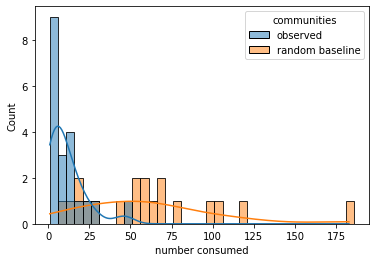

In [3]:
label_prop_data = test_data['label_prop']
temp = []
for user, data in label_prop_data.items():
    actual = data['actual'][0]
    average = s.mean(data['random'])
    temp.append([user,'observed',actual])
    temp.append([user,'random baseline',average])
df = pd.DataFrame(temp, columns = ['user','communities','number consumed'])
sns.histplot(hue='communities',x='number consumed',data=df,binwidth=5,kde=True)

In [4]:
intervals = int(max(list(df['number consumed']))/10)
bins = np.linspace(start=0,stop=int(max(list(df['number consumed'])))+1,num = intervals)
#bins = np.linspace(start=0,stop=int(max(list(df['number consumed'])))+1,num = 10)
df["bucket"],bin_list = pd.cut(df['number consumed'], bins,retbins=True)
print(df.head())
groups = df.groupby(['communities', pd.cut(df['number consumed'], bins)])
test_vals = pd.DataFrame(groups.size().unstack()).fillna(0)

    user      communities  number consumed            bucket
0  18370         observed             28.0  (21.529, 32.294]
1  18370  random baseline            182.8  (172.235, 183.0]
2   7301         observed              1.0     (0.0, 10.765]
3   7301  random baseline             18.7  (10.765, 21.529]
4  18035         observed              4.0     (0.0, 10.765]


In [5]:
observed = test_vals[test_vals.index=='observed'].values[0]
expected = [val+.001 for val in test_vals[test_vals.index=='random baseline'].values[0]]

test_stat = sum([((observed[i]-expected[i])**2)/expected[i] for i in range(0,len(observed))])
df = intervals-2
print(test_stat)
p_val = 1 - st.chi2.cdf(test_stat, df)
print(df)
print(p_val)

136.7021175732174
16
0.0


In [6]:
louvain_data = test_data['louvain']

<AxesSubplot:xlabel='number consumed', ylabel='Count'>

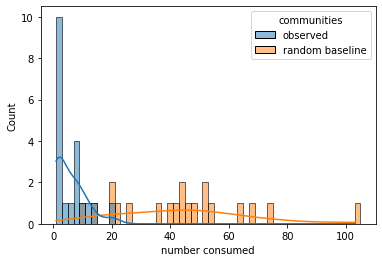

In [7]:
temp = []
for user, data in louvain_data.items():
    actual = data['actual'][0]
    average = s.mean(data['random'])
    temp.append([user,'observed',actual])
    temp.append([user,'random baseline',average])
df = pd.DataFrame(temp, columns = ['user','communities','number consumed'])
sns.histplot(hue='communities',x='number consumed',data=df,binwidth=2,kde=True)

In [8]:
intervals = int(max(list(df['number consumed']))/10)
bins = np.linspace(start=0,stop=int(max(list(df['number consumed'])))+1,num = intervals)
#bins = np.linspace(start=0,stop=int(max(list(df['number consumed'])))+1,num = 10)
df["bucket"],bin_list = pd.cut(df['number consumed'], bins,retbins=True)
print(df.head())
groups = df.groupby(['communities', pd.cut(df['number consumed'], bins)])
test_vals = pd.DataFrame(groups.size().unstack()).fillna(0)

    user      communities  number consumed            bucket
0  18370         observed            12.00  (11.556, 23.111]
1  18370  random baseline           103.15   (92.444, 104.0]
2   7301         observed             1.00     (0.0, 11.556]
3   7301  random baseline            19.65  (11.556, 23.111]
4  18035         observed             1.00     (0.0, 11.556]


In [9]:
observed = test_vals[test_vals.index=='observed'].values[0]
expected = [val+.001 for val in test_vals[test_vals.index=='random baseline'].values[0]]

test_stat = sum([((observed[i]-expected[i])**2)/expected[i] for i in range(0,len(observed))])
df = intervals-2
print(test_stat)
p_val = 1 - st.chi2.cdf(test_stat, df)
print(df)
print(p_val)

270.9697263518785
8
0.0
